**Analyze our Personal Facebook Data with Python**

The dataset can be downloaded from the user's profile on facebook and save the data in json format.
Here in this notebook we are working on only posts.

**Importing libraries and reading the data**

In [1]:
import pandas as pd 

# read the json file into a dataframe
df = pd.read_json('your_posts_1.json')

In [2]:
df.head()

,timestamp,data,title,attachments,tags
0,2021-05-07 11:10:17,[{'post': 'Happy birthday brother ð'}],Arjun Maurya wrote on Ash Maurya's timeline.,NaN,NaN
1,2021-04-14 23:32:00,[{'post': 'Happy birthday bhai ð ð¥³'}],Arjun Maurya wrote on Naman Pratap Singh's tim...,NaN,NaN
2,2021-03-26 14:15:24,[{'post': 'Alles gut zum geburstag ððð...,Arjun Maurya wrote on Steffi Spremberg's timel...,NaN,NaN
3,2021-03-02 14:19:46,[{'post': 'Happy birthday bhai ð¥³ð'}],Arjun Maurya wrote on Sourabh Krishnatrey's ti...,NaN,NaN
4,2021-02-28 13:58:36,[{'post': 'Happy birthday bhai ðð¥³'}],Arjun Maurya wrote on Aditya Kumar's timeline.,NaN,NaN


**Remaning the columns**

In [3]:
# rename the timestamp column
df.rename(columns={'timestamp': 'date'}, inplace=True)

In [4]:
#drop some unnecessary columns
df = df.drop(['attachments', 'title', 'tags'], axis=1)

In [5]:
# making sure it's datetime format
pd.to_datetime(df['date'])

0      2021-05-07 11:10:17
1      2021-04-14 23:32:00
2      2021-03-26 14:15:24
3      2021-03-02 14:19:46
4      2021-02-28 13:58:36
               ...        
1620   2010-08-30 05:57:26
1621   2010-08-27 18:30:31
1622   2010-08-22 10:20:53
1623   2010-08-18 18:07:03
1624   2010-08-18 17:54:57
Name: date, Length: 1625, dtype: datetime64[ns]

In [6]:
df.head()

,date,data
0,2021-05-07 11:10:17,[{'post': 'Happy birthday brother ð'}]
1,2021-04-14 23:32:00,[{'post': 'Happy birthday bhai ð ð¥³'}]
2,2021-03-26 14:15:24,[{'post': 'Alles gut zum geburstag ððð...
3,2021-03-02 14:19:46,[{'post': 'Happy birthday bhai ð¥³ð'}]
4,2021-02-28 13:58:36,[{'post': 'Happy birthday bhai ðð¥³'}]


- Now we've got something a little cleaner to work with! If we want to check how many posts we're analyzing, we could use df.shape to count the rows.

- It might also be a good idea to use df.tail() to check the end of our dataframe, just to be sure it really spans our entire Facebook usage:

In [7]:
print(df.shape)
df.tail(3)

(1625, 2)


,date,data
1622,2010-08-22 10:20:53,[{'update_timestamp': 1282472453}]
1623,2010-08-18 18:07:03,[{'update_timestamp': 1282154823}]
1624,2010-08-18 17:54:57,[{'update_timestamp': 1282154097}]


In the case of my personal Facebook data, it looks like I've posted over 1,000 times in total.

**Figuring Out Monthly Post Count**

We need to do two things here:

- Set the date column as the index of our DataFrame.
- Resample the data by month, counting how many posts occur in each month.

For the first step, we can use **set_index()**. The second step is a bit more complex, so let's break it down into four separate steps to break down the code we need to write:

- Select the column we want to resample by — in this case, is the data column.
- Use the .resample() function with the argument 'MS' (for "Month Start") to resample our data by month.
- Use .size() to specify what we want to measure each month — in this case, the number of rows (i.e., posts)  with a post date that fall within that month.

- Assign the resulting Series to a variable called post_counts.

In [8]:
df = df.set_index('date')
post_counts = df['data'].resample('MS').size()
post_counts

date
2010-08-01     5
2010-09-01     1
2010-10-01     3
2010-11-01    14
2010-12-01     7
              ..
2021-01-01     0
2021-02-01     4
2021-03-01     2
2021-04-01     1
2021-05-01     1
Freq: MS, Name: data, Length: 130, dtype: int64

That looks great! We've got our post counts broken down by month, and if we check the original data set, we can quickly see the counts are correct.

**Visualize Your Facebook Usage**

**Importing required libraries**

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Setting size and font:

In [10]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

Setting labels and creating plots:

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


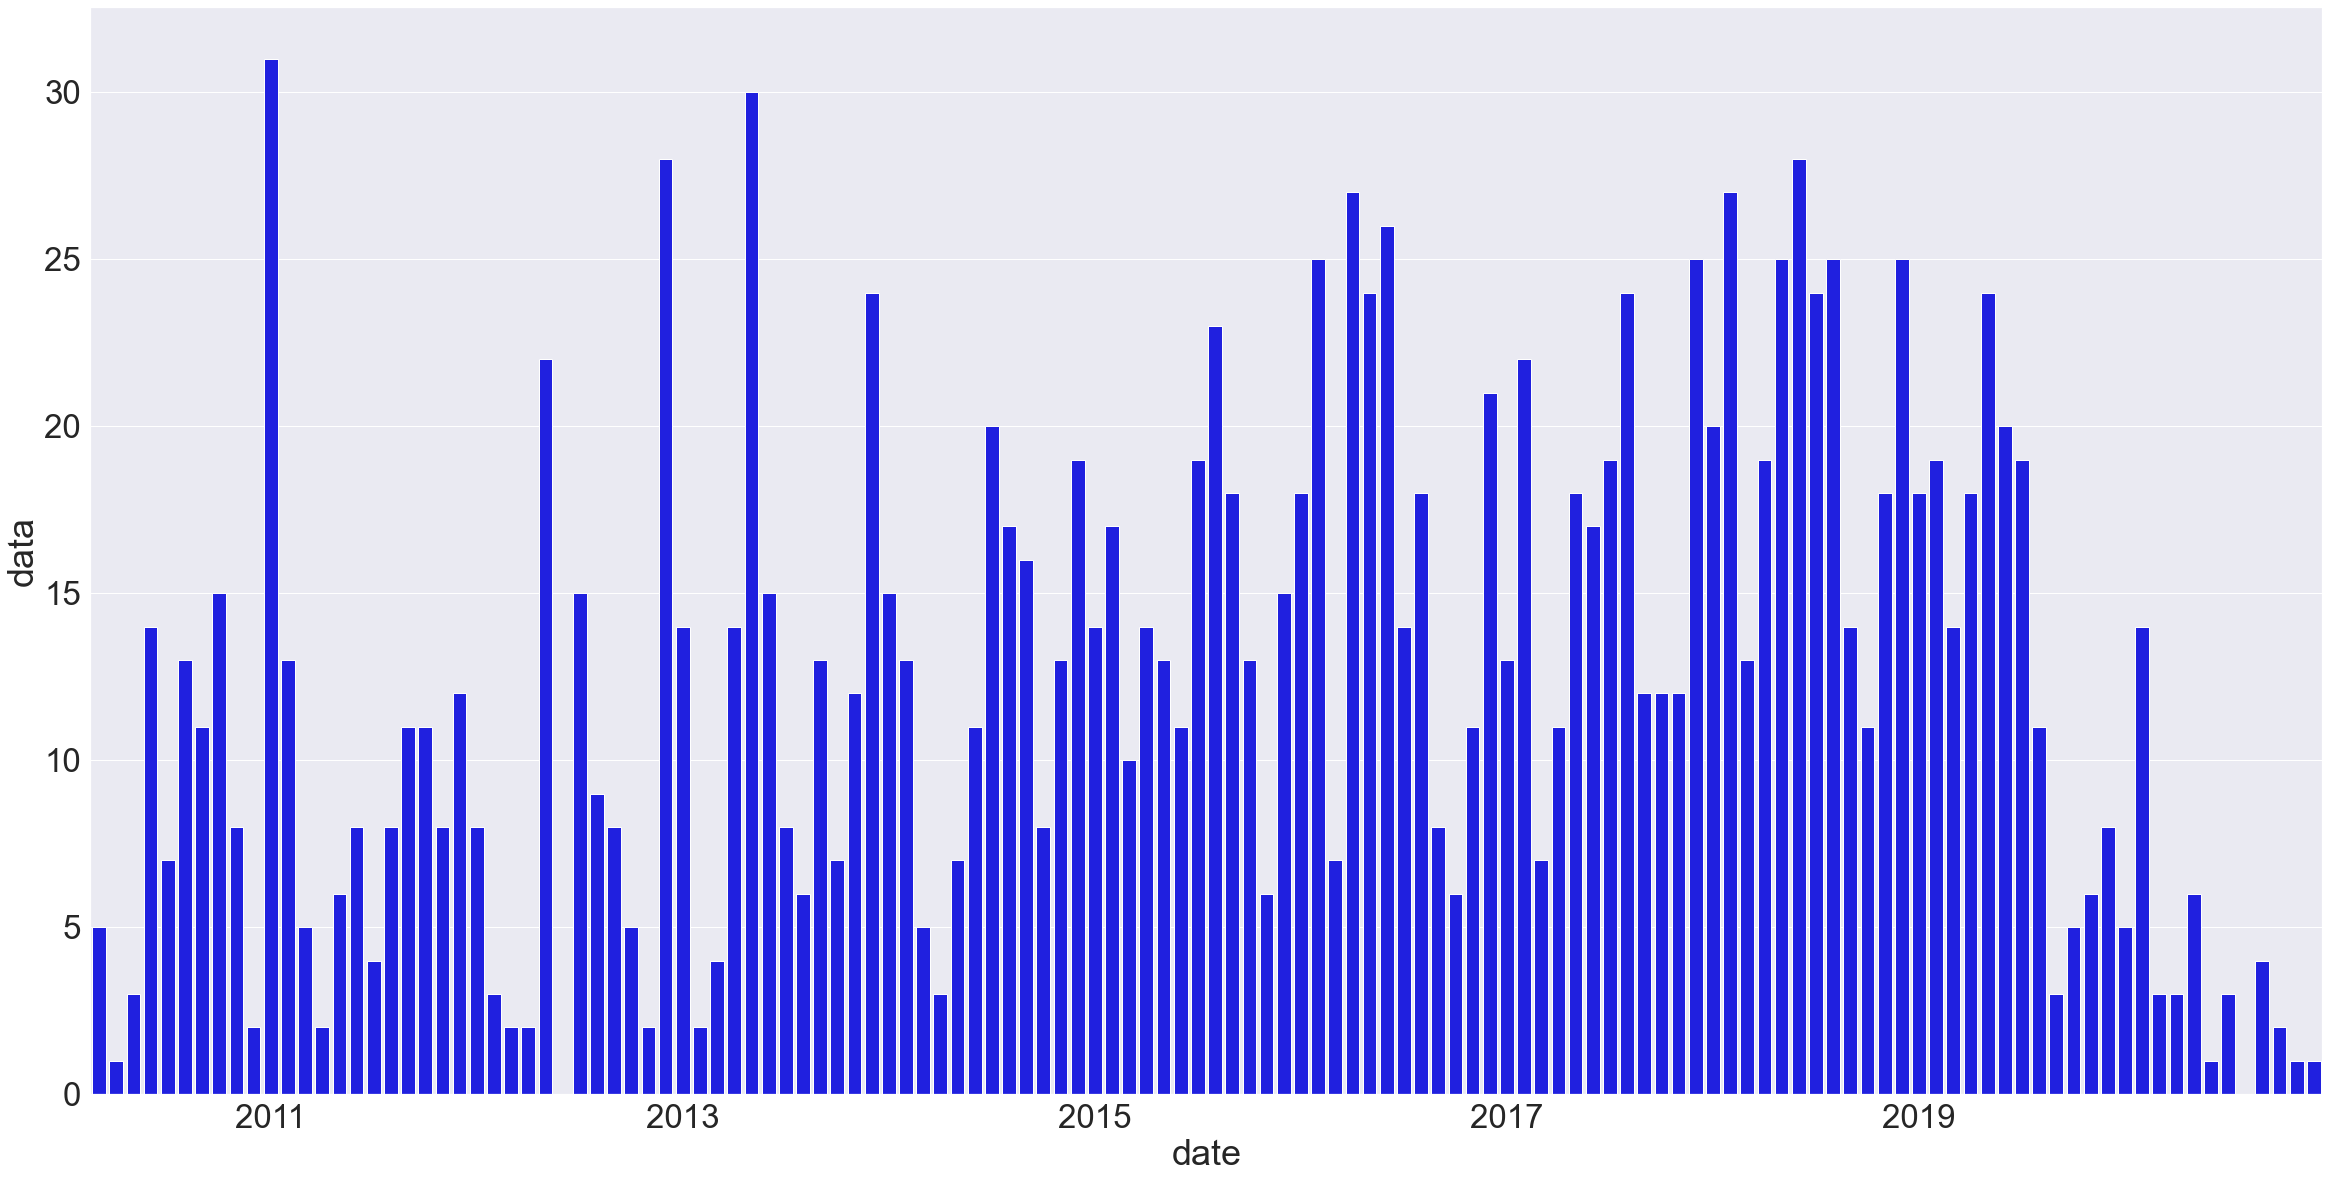

In [13]:
# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

plt.show()